# Uncorrelatedness does not imply independence

### Purpose
1. **Sec. 0~3**: In this sections, we'd like to show a counterexample, why simply **_uncorrelate the observe mixed signals_** (i.e, perform Mahalanobis transformantion to observed $\mathbf{X}$) cannot derive blind source signals, which are actually **"independent"**

1. **Sec. 4**: after showing the *wrong* transformation that doesn't work, we than perform **ICA** methoud, which could actually separate the "independent" signals, as required. (We also compare with PCA and FA results, which don't work in this case either)

In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#os.getcwd()

# 0. Generate Data: Independent Signals $\mathbf{Y}$ (3-D)

For sample size ($N$) = 20000, we try to generate 3 independent signals ($Y_1 \sim Y_3$), where

> $y \sim p \operatorname{N(0,1)}+ (1-p) \operatorname{N(1,4)}, \quad p \in [0,1]$

> $Y_1$: generated with $p=p_1= 0.2$  
> $Y_2$: generated with $p=p_1= 0.5$  
> $Y_3$: generated with $p=p_1= 0.8$  


In [112]:
# Define function to generate y based on parameter p
def Generate_y(p, N):
    '''
    input:
        p: parameter to generate y, p \in [0,1]
        N: sample size
    output:
        y: i.i.d. sample 
    '''
    u = np.random.uniform(low=0.0, high=1.0, size=N)
    z1 = np.random.normal(loc=0.0, scale=1.0, size=N)
    z2 = np.random.normal(loc=1.0, scale=4.0, size=N) #np.random.normal(loc=10.0, scale=5.0, size=N)
    y = (u<p)*z1 + (u>=p)*z2
    return y

In [113]:
# ======================================= 0. Generate Data: Independent Signals Y (3-D) =========================================================
#from scipy import signal
np.random.seed(2022)

N = 1000
p1 = 0.2
p2 = 0.5
p3 = 0.8

Y1 = Generate_y(p1, N)
Y2 = Generate_y(p2, N)
Y3 = Generate_y(p3, N)



Y = pd.concat([pd.Series(Y1), pd.Series(Y2), pd.Series(Y3)], axis=1)
#Y.columns =  ['Y1', 'Y2', 'Y3']

#print('A glance of Y with dim={}: \n'.format(Y.shape))
#Y.head(10)

In [114]:
from scipy.stats import norm, kurtosis
print('Kurtosis of Y1 is \t', kurtosis(Y1))
print('Kurtosis of Y1 is \t', kurtosis(Y2))
print('Kurtosis of Y1 is \t', kurtosis(Y3))


print('Where the estimated Kurtosis of Standard normal is {}, which is closed to 0.'.format( kurtosis(np.random.normal(loc=0.0, scale=1.0, size=10000)) ))



Kurtosis of Y1 is 	 0.7206067474677909
Kurtosis of Y1 is 	 3.014053826678402
Kurtosis of Y1 is 	 5.5685319549401004
Where the estimated Kurtosis of Standard normal is 0.020825227979939243, which is closed to 0.


- ## Standardize $\mathbf{Y}$

In [115]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
Y = sc_y.fit_transform(Y)

Y = pd.DataFrame(Y)
Y.columns =  ['Y1', 'Y2', 'Y3']

print('A glance of Y with dim={}: \n'.format(Y.shape))
Y.head(10)


A glance of Y with dim=(1000, 3): 



,Y1,Y2,Y3
0,-0.256022,0.317938,0.432192
1,-1.214546,-0.409403,-0.113323
2,-0.393576,0.003475,-0.245589
3,-0.623112,0.076654,-0.393128
4,-0.262403,-0.841917,0.267091
5,-0.536632,1.169644,-0.059055
6,2.395752,0.500190,-0.590189
7,0.064262,0.002910,-0.420995
8,-0.527359,0.143716,-0.576064
9,0.438301,0.621324,0.043869


- ## Check correlations among $Y_1 \sim Y_3$

Since $Y_1 \sim Y_3$ are (almost) independent, their estimated correlations should be close to 0.
Let's check out the correlation matrix (i.e., $Corr$)
> The following shows that the estimated correlations between different $Y$'s are close to 0 (e.g., $corr(Y_1, Y_2)=0.054$).

In [116]:
# Check correlation among Y1~Y3
print('Corr matrix of Y is: \n')
np.round(Y.corr(), 3)

Corr matrix of Y is: 



,Y1,Y2,Y3
Y1,1.000,0.014,0.020
Y2,0.014,1.000,0.027
Y3,0.020,0.027,1.000


- ## Visualization of Signals $\mathbf{Y}$

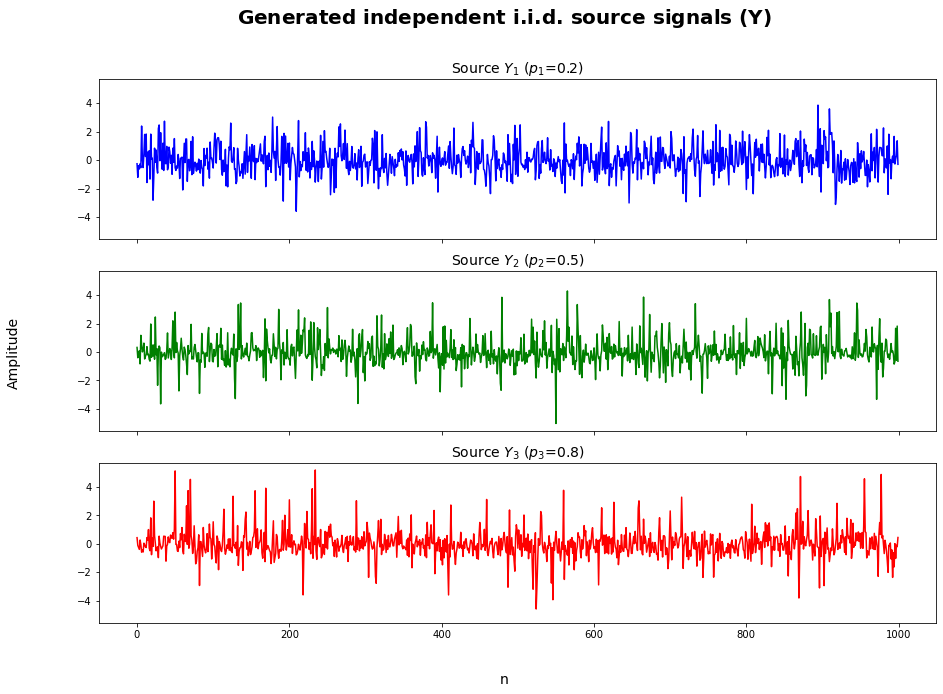

In [117]:
# Visualization of source and mixing data  -------------------------------------------------------------
n = range(N)

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10)) #
# Y1
ax[0].set_title(f'Source $Y_1$ ($p_1$={p1})', fontsize=14)
ax[0].plot(n, Y.Y1, label="Source Y1", color = 'b')  #

# Y2
ax[1].set_title(f'Source $Y_2$ ($p_2$={p2})', fontsize=14)
ax[1].plot(n, Y.Y2, label="Source Y2", color = 'g') #

# Y3
ax[2].set_title(f'Source $Y_3$ ($p_3$={p3})', fontsize=14)
ax[2].plot(n, Y.Y3, label="Source Y3", color = 'r') #

fig.text(0.5, 0.04, 'n', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Generated independent i.i.d. source signals ($\mathbf{Y}$)", fontsize=20, fontweight ='bold')
plt.savefig('Generated independent i.i.d. source signals Y.png', transparent=True)
plt.show()


**Note**:
1. Since $Y_1 \sim Y_3$ is i.i.d. (Independent and identically distributed) random variables, they are actually just noises with different scales (based on parameter $p$); that is to say, and it's order (or time) irrelevant.
1. As a result, we can just visualize $\mathbf{Y}$ in frequency plots as well as 3-D scatter plots, as shown below.

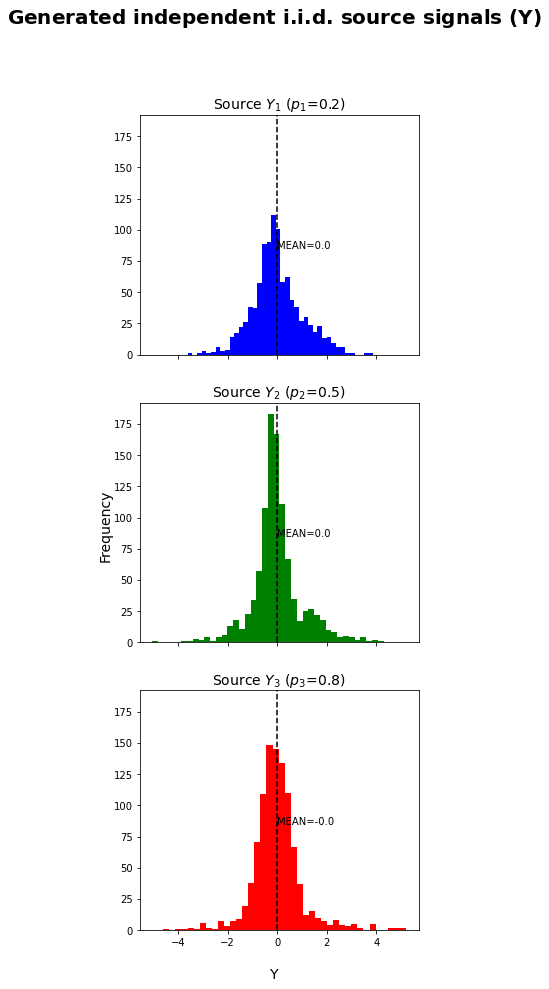

In [118]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(5,15)) #
# Y1
ax[0].set_title(f'Source $Y_1$ ($p_1$={p1})', fontsize=14)
ax[0].hist(Y.Y1,label="Source Y1", color = 'b', bins=40) 
ax[0].axvline(Y.Y1.mean(), color='k', linestyle='--')
ax[0].annotate(f"MEAN={round(Y.Y1.mean(),2)}", xy = (Y.Y1.mean(), 0), xytext = (Y.Y1.mean(),85))
#f'MEAN({col})= '+str(round(M,4)),xy = (M, 0), xytext = (M, -8), arrowprops =dict(facecolor="black")

# Y2
ax[1].set_title(f'Source $Y_2$ ($p_2$={p2})', fontsize=14)
ax[1].hist(Y.Y2,label="Source Y2", color = 'g', bins=40) 
ax[1].axvline(Y.Y2.mean(), color='k', linestyle='--')
ax[1].annotate(f"MEAN={round(Y.Y2.mean(),2)}", xy = (Y.Y2.mean(), 0), xytext = (Y.Y2.mean(),85))

# Y3
ax[2].set_title(f'Source $Y_3$ ($p_3$={p3})', fontsize=14)
ax[2].hist(Y.Y3,label="Source Y3", color = 'r', bins=40)
ax[2].axvline(Y.Y3.mean(), color='k', linestyle='--')
ax[2].annotate(f"MEAN={round(Y.Y3.mean(),2)}", xy = (Y.Y3.mean(), 0), xytext = (Y.Y3.mean(),85))

fig.text(0.5, 0.08, 'Y', ha='center', fontsize=14)
fig.text(0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Generated independent i.i.d. source signals ($\mathbf{Y}$)", fontsize=20, fontweight ='bold')
plt.show()

In [119]:
!pip install plotly
#!/Users/jane_hsieh/opt/anaconda3/bin/python -m pip install --upgrade pip

In [120]:
import plotly.express as px

Y_range = [np.floor(Y.Y1.min()), np.ceil(Y.Y1.max())]; print('The range of Y\'s is set at [{:.2f}, {:.2f}]'.format(Y_range[0],Y_range[1]))

fig = px.scatter_3d(Y, x='Y1', y='Y2', z='Y3', 
                    range_x=Y_range, range_y=Y_range, range_z=Y_range,
                    ) #, size=len(Y)*[0.1], width = 800, height = 800
fig.update_traces(marker_size = 3)
fig.show()
fig.write_html("Y.html")


The range of Y's is set at [-4.00, 4.00]


# 1.  Derive Data: Mixed Signals $\mathbf{X}$ (3-D) from Source Signals $\mathbf{Y}$

First, we can desgin mixing matrix $\mathbf{A} = \mathbf{W}^{-1}$ of our own, and hence derive the mixing signals $\mathbf{X}$ by $\mathbf{X} = \mathbf{A}\mathbf{Y}$ (i.e., $\mathbf{Y}=\mathbf{W}\mathbf{X}$).

The result is as follows:

- ## mixing matrix $\mathbf{A}$

In [121]:
# ======================================= 1. Derive Data: Mixed Signals X (3-D) =========================================================
# Design mixing matrix A
'''
A = np.array([[ 1.31,  0.14,  0.18],
              [-0.42, -1.26, -1.25],
              [-0.03,  0.41, -0.49]]) * (0.01)
'''
A = np.array([[ 0.33,  0.33,  0.34],
              [ 1.50,  1.50,  0.05],
              [ 1.05,  0.45,  0.45]]) 
print('Mixing matrix A is:\n')
pd.DataFrame(A)

Mixing matrix A is:



,0,1,2
0,0.33,0.33,0.34
1,1.50,1.50,0.05
2,1.05,0.45,0.45


- ## nonsingular linear transformation matrix $\mathbf{W}$ ($=\mathbf{A}^{-1}$)

That is, a matrix to extract source signals $\mathbf{Y}$ back from performing transformation from $\mathbf{X} $(i.e., $\mathbf{Y}=\mathbf{W}\mathbf{X}$).

In [122]:
# Derive W= inverse of A
W = np.linalg.inv(A)

print('And hence that nonsingular linear transformation matrix W is:\n')
pd.DataFrame(W)

And hence that nonsingular linear transformation matrix W is:



,0,1,2
0,-2.203647,-0.015198,1.666667
1,2.102330,0.704154,-1.666667
2,3.039514,-0.668693,0.000000


- ## Visualization of Mixed Signals $\mathbf{X}$

In [123]:
X = np.dot(A, Y.T).T
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
#print('Corr matrix of X is {}'.format(X.corr()))

print('A glance of X: \n')
X.head(10)

A glance of X: 



,X1,X2,X3
0,0.167378,0.114484,0.068736
1,-0.574433,-2.441589,-1.510499
2,-0.212234,-0.597432,-0.522207
3,-0.313995,-0.839342,-0.796681
4,-0.273615,-1.643126,-0.534195
5,0.188815,0.946565,-0.063698
6,0.754996,4.314402,2.475039
7,-0.120971,0.079710,-0.120662
8,-0.322464,-0.604267,-0.748283
9,0.364592,1.591632,0.759553


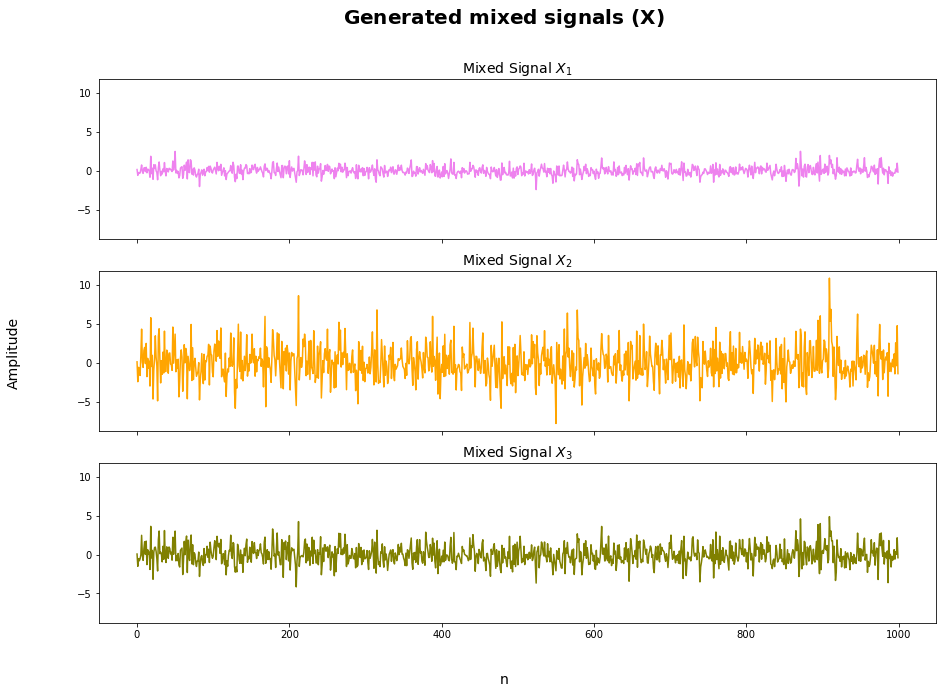

In [124]:
# Visualization of source and mixing data  -------------------------------------------------------------

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10)) #
# X1
ax[0].set_title('Mixed Signal $X_1$', fontsize=14)
ax[0].plot(n, X.X1, label="Mixture X1", color = 'violet')  #

# X2
ax[1].set_title('Mixed Signal $X_2$', fontsize=14)
ax[1].plot(n, X.X2, label="Mixture X2", color = 'orange') #

# X3
ax[2].set_title('Mixed Signal $X_3$', fontsize=14)
ax[2].plot(n, X.X3, label="Mixture X3", color = 'olive') #

fig.text(0.5, 0.04, 'n', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Generated mixed signals ($\mathbf{X}$)", fontsize=20, fontweight ='bold')
#plt.savefig('Generated mixed signals X.png', transparent=True)
plt.show()



In [125]:
X_range = [np.floor(X.X2.min()), np.ceil(X.X2.max())]; print('The range of X\'s is set at [{:.2f}, {:.2f}]'.format(X_range[0],X_range[1]))

fig = px.scatter_3d(X, x='X1', y='X2', z='X3', 
                    range_x=X_range, range_y=X_range, range_z=X_range,
                    ) #, size=len(Y)*[0.1], width = 800, height = 800
fig.update_traces(marker_size = 3)
fig.show()
fig.write_html("X.html")



The range of X's is set at [-8.00, 11.00]


# 2. Derive Data: Uncorrelated Signals $\hat{\mathbf{Y}}$ (3-D) from Mahalanobis transformation of $\mathbf{X}$

To show that "Uncorrelatedness does not imply independence," here we'd like first to extract the uncorrelated signals (defined as $\hat{\mathbf{Y}}$ such that $Corr(\hat{\mathbf{Y}})= \mathbf{I}$) by the Mahalanobis transformation of $\mathbf{X}$, and then show the uncorrelated signals $\hat{\mathbf{Y}}$ are definitely different from true source (& independent) signals $\mathbf{Y}$

**Note**: 
1. *Mahalanobis transformation of $\mathbf{X}$ is definded as:*
> $\mathbf{\hat{Y}} = \hat{\mathbf{\Sigma}}_\mathbf{X}^{-\frac{1}{2}} \mathbf{X} \\$
 where $\hat{\mathbf{\Sigma}}_\mathbf{X} \equiv
\hat{\operatorname{Cov}(\mathbf{X}) }$

1. Remember that true independent signals $\mathbf{Y}$ can be derived by
> $\mathbf{Y}=\mathbf{W}\mathbf{X}$

1. From above, we show that $\hat{\mathbf{Y}} \neq  \mathbf{Y}$ apparently, since
> $\hat{\mathbf{\Sigma}}_\mathbf{x}^{-\frac{1}{2}} \neq \mathbf{W}$

In [126]:
# ======================================= 2. Derive Data: Uncorrelated Signals Y_hat (3-D) from Mahalanobis transformation =========================================================
#2.1 Derive inverse-square-root of Cov(X) ----------------------------------------------
Cov_X = X.cov()
## Singular value decomposition (Sample)
U, s, Vt = np.linalg.svd(Cov_X) # where Cov_X = np.dot(U * s, Vt)
## define inverse of square-root of S_normal
Cov_X_insqr = np.dot(U * (s**(-0.5)), Vt)


Notice that the inverse of square-root of $Cov(\mathbf{X})$ (i.e., $\hat{\mathbf{\Sigma}}_\mathbf{x}^{-\frac{1}{2}}$)  is 

In [127]:
print('{}'.format( np.round(Cov_X_insqr,2) ))

[[ 4.13 -0.25 -1.21]
 [-0.25  0.77 -0.56]
 [-1.21 -0.56  1.96]]


, which is not equal to $\mathbf{W} =$

In [128]:
print('{}'.format( np.round(W,2) ))

[[-2.2  -0.02  1.67]
 [ 2.1   0.7  -1.67]
 [ 3.04 -0.67  0.  ]]


- ## Visualization of Uncorrelated Signals $\hat{\mathbf{Y}}$ (i.e., $\hat{Y_1} \sim \hat{Y_3}$)

In [129]:
#2.2 Derive Y_hat from Mahalanobis transformation ----------------------------------------------
Y_hat = np.dot(Cov_X_insqr, X.T).T
Y_hat = pd.DataFrame(Y_hat, columns=['Y1_m', 'Y2_m', 'Y3_m'])

print('A glance of Y_hat: \n')
Y_hat.head(10)

A glance of Y_hat: 



,Y1_m,Y2_m,Y3_m
0,0.578939,0.008290,-0.131633
1,0.066833,-0.897957,-0.907182
2,-0.094628,-0.116766,-0.434669
3,-0.121924,-0.124959,-0.715198
4,-0.072948,-0.901421,0.199285
5,0.620523,0.718657,-0.881525
6,-0.956191,1.759740,1.537046
7,-0.372930,0.158907,-0.134766
8,-0.274029,0.031493,-0.741056
9,0.188299,0.713363,0.161535


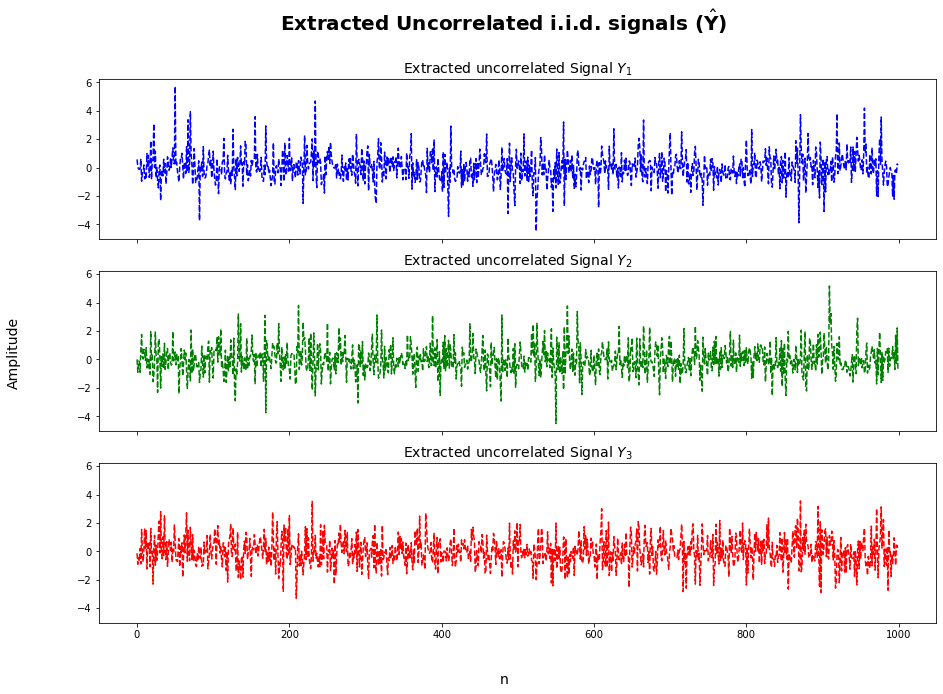

In [130]:
# Visualization of source and mixing data  -------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10)) #
# Y1
ax[0].set_title('Extracted uncorrelated Signal $Y_1$', fontsize=14)
ax[0].plot(n, Y_hat.Y1_m, label="uncorrelated Y1", color = 'b', linestyle='--')  

# Y2
ax[1].set_title('Extracted uncorrelated Signal $Y_2$', fontsize=14)
ax[1].plot(n, Y_hat.Y2_m, label="uncorrelated Y2", color = 'g', linestyle='--') 

# Y3
ax[2].set_title('Extracted uncorrelated Signal $Y_3$', fontsize=14)
ax[2].plot(n, Y_hat.Y3_m, label="uncorrelated Y3", color = 'r', linestyle='--') 

fig.text(0.5, 0.04, 'n', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Extracted Uncorrelated i.i.d. signals ($\hat{\mathbf{Y}}$)", fontsize=20, fontweight ='bold')
plt.savefig('Extracted Uncorrelated i.i.d. signals Y.png', transparent=True)
plt.show()

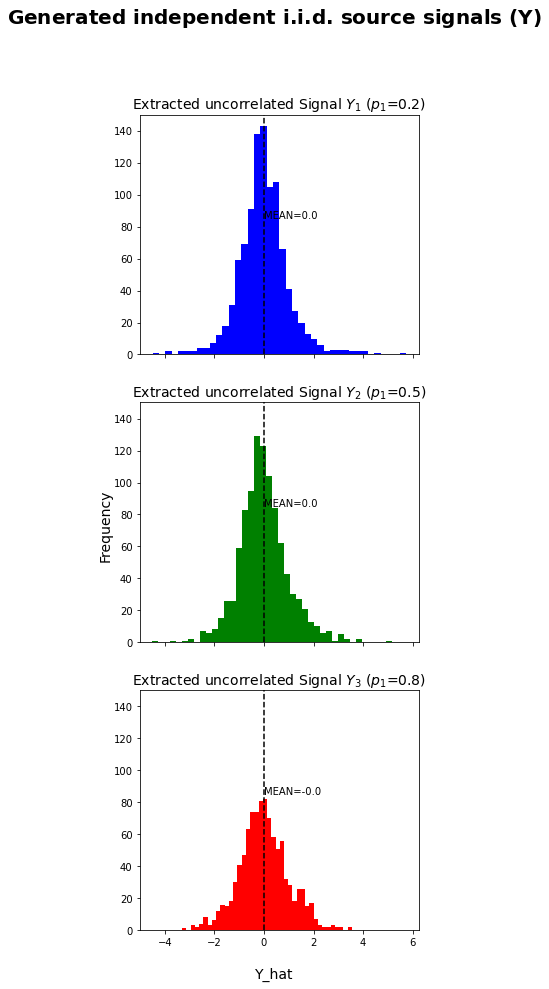

In [131]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(5,15)) #
# Y1
ax[0].set_title(f'Extracted uncorrelated Signal $Y_1$ ($p_1$={p1})', fontsize=14)
ax[0].hist(Y_hat.Y1_m,label="uncorrelated Y1", color = 'b', bins=40) 
ax[0].axvline(Y_hat.Y1_m.mean(), color='k', linestyle='--')
ax[0].annotate(f"MEAN={round(Y.Y1.mean(),2)}", xy = (Y.Y1.mean(), 0), xytext = (Y.Y1.mean(),85))
#f'MEAN({col})= '+str(round(M,4)),xy = (M, 0), xytext = (M, -8), arrowprops =dict(facecolor="black")

# Y2
ax[1].set_title(f'Extracted uncorrelated Signal $Y_2$ ($p_1$={p2})', fontsize=14)
ax[1].hist(Y_hat.Y2_m,label="uncorrelated Y2", color = 'g', bins=40) 
ax[1].axvline(Y_hat.Y2_m.mean(), color='k', linestyle='--')
ax[1].annotate(f"MEAN={round(Y.Y2.mean(),2)}", xy = (Y.Y2.mean(), 0), xytext = (Y.Y2.mean(),85))

# Y3
ax[2].set_title(f'Extracted uncorrelated Signal $Y_3$ ($p_1$={p3})', fontsize=14)
ax[2].hist(Y_hat.Y3_m,label="uncorrelated Y3", color = 'r', bins=40)
ax[2].axvline(Y_hat.Y3_m.mean(), color='k', linestyle='--')
ax[2].annotate(f"MEAN={round(Y.Y3.mean(),2)}", xy = (Y.Y3.mean(), 0), xytext = (Y.Y1.mean(),85))

fig.text(0.5, 0.08, 'Y_hat', ha='center', fontsize=14)
fig.text(0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Generated independent i.i.d. source signals ($\mathbf{Y}$)", fontsize=20, fontweight ='bold')
plt.show()

In [132]:
Y_range = [np.floor(Y_hat.Y1_m.min()), np.ceil(Y_hat.Y1_m.max())]; print('The range of Y\'s is set at [{:.2f}, {:.2f}]'.format(Y_range[0],Y_range[1]))

fig = px.scatter_3d(Y_hat, x='Y1_m', y='Y2_m', z='Y3_m', 
                    range_x=Y_range, range_y=Y_range, range_z=Y_range,
                    ) #, size=len(Y)*[0.1], width = 800, height = 800
fig.update_traces(marker_size = 3)
fig.show()
fig.write_html("Y_Mahalanobis.html")


The range of Y's is set at [-5.00, 6.00]


- ## Check correlations among $\hat{Y_1} \sim \hat{Y_3}$

According to Mahalanobis transformation, we can demonstrate that $\hat{Y_1} \sim \hat{Y_3}$ are mutually uncorrelated (shown below, where correlation matirx equals identity matrix).

However, it doesn't mean that these signals are independent! 
(This can be checked by evaluation of cumulants which are investigated in the next section)

In [133]:
## Check correlation of Y_hat
print( 'Corr matrix of Y_hat is\n' )
np.round(Y_hat.corr(), 4) 

Corr matrix of Y_hat is



,Y1_m,Y2_m,Y3_m
Y1_m,1.0,-0.0,-0.0
Y2_m,-0.0,1.0,-0.0
Y3_m,-0.0,-0.0,1.0


# 3. Derive True Independent Signals $\mathbf{Y}_{ICA}$ (3-D) from ICA

The previous section demonstrates that Mahalanobis transformation fails to extract true **independent signals**, in this section, we'd like to demonstrate that:
1. ICA can succeed in doing so (i.e., Transform $\mathbf{X}$ with ICA to derive $\hat{\mathbf{Y}}_{ICA}$ s.t. $\mathbf{Y}_{ICA} = \mathbf{Y}$)
1. We also compare it with the results of derived signals from other techniques, that is, **Principle Component Analysis (PCA)** and **Factor Analysis (FA)**

## 3.1. ICA Results (i.e., $\mathbf{Y}_{ICA}$)

In [134]:
## -------------------------------------- 1.1 ICA Analysis --------------------------------------------------------------
### Preprocessing Data --------------------------------------------------------------
# Centering the mixed signals
#X_m = X - X.mean() #no need for centoring again since X is already mean-centered
X_m = X 

# Recaling of variance (i.e., standardization) of X1, X2 is not performed here since in later analysis,
# "whitening" would be operated instead

### ICA --------------------------------------------------------------
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=3, random_state=0, whiten='unit-variance')
Y_pred = transformer.fit_transform(X_m)
Y_pred.shape




(1000, 3)

In [135]:
# Estimate W by ICA ???????????????????????????????????????????????????????????????????????????

W_ICA_after_whiten = transformer.components_ # = np.dot(unmixing_matrix, self.whitening_) when whiten is True.

WT = transformer.whitening_

#print('ICA-estimated matrix W is:\n')
#pd.DataFrame(W_ICA)

#print('The pre-whitening matrix that projects data X onto the first n_components principal components is:\n')
#pd.DataFrame(WT)

#print('ICA-estimated matrix W (after whitening) is:\n')
#pd.DataFrame(W_ICA_after_whiten)

In [136]:
W_ICA_before_whiten = np.dot( W_ICA_after_whiten, np.linalg.inv(WT))

print('ICA-estimated matrix W (before whitening)is:\n')
pd.DataFrame(W_ICA_before_whiten)

ICA-estimated matrix W (before whitening)is:



,0,1,2
0,-0.634896,-0.550872,-0.541708
1,0.155041,-0.777731,0.609177
2,-0.756882,0.302777,0.579186


In [137]:
print('Compared with the true matrix W is:\n')
pd.DataFrame(W)

Compared with the true matrix W is:



,0,1,2
0,-2.203647,-0.015198,1.666667
1,2.102330,0.704154,-1.666667
2,3.039514,-0.668693,0.000000


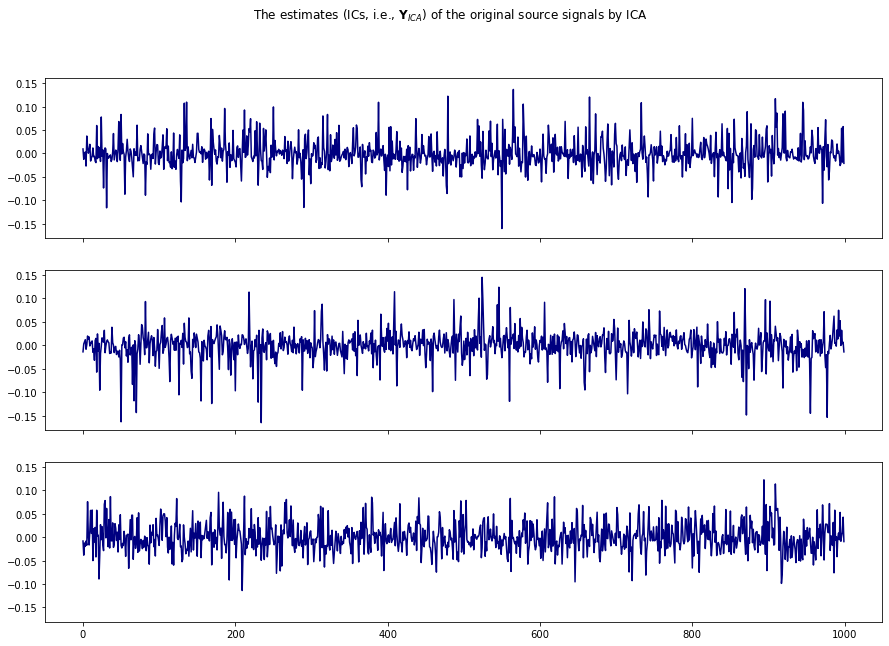

In [138]:
ig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
# Plot seperated signals
ax[0].plot(n, Y_pred[:,0], label="IC Y1", color = 'navy')
ax[1].plot(n, Y_pred[:,1], label="IC Y2", color = 'navy')
ax[2].plot(n, Y_pred[:,2], label="IC Y3", color = 'navy')

plt.suptitle("The estimates (ICs, i.e., $\mathbf{Y}_{ICA}$) of the original source signals by ICA")
plt.show()
#plt.savefig("ICA estimates of source data.png", transparency=True)

In [139]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred.columns = ['IC1', 'IC2', 'IC3']


#Y_range = [np.floor(Y_hat.Y1_m.min()), np.ceil(Y_hat.Y1_m.max())]; print('The range of Y\'s is set at [{:.2f}, {:.2f}]'.format(Y_range[0],Y_range[1]))

fig = px.scatter_3d(Y_pred, x='IC1', y='IC2', z='IC3') #,range_x=Y_range, range_y=Y_range, range_z=Y_range, size=len(Y)*[0.1], width = 800, height = 800
fig.update_traces(marker_size = 3)
fig.show()
fig.write_html("Y_ICA.html")


## 3.2. PCA Results (i.e., $\mathbf{Y}_{PCA}$)

In [140]:
## -------------------------------------- 1.2 PCA Analysis --------------------------------------------------------------
### Preprocessing Data --------------------------------------------------------------
# Standardize the mixed signals (i.e., mean=0, std=1)
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
matrix = sc_X.fit_transform(X)
'''#check
matrix.mean(axis=0) 
matrix.std(axis=0) 
'''

### PCA --------------------------------------------------------------
from sklearn.decomposition import PCA
pca = PCA(n_components=3) #n_components=None or integer
Y_pred_PCA = pca.fit_transform(matrix)
#PCs = pca.components_ #each row is a PC -> PC1 = pca.components_[0,:]

#Rescale Y_pred_PCA to the original scale as that of matrix (X)
Y_pred_PCA_rs = sc_X.inverse_transform(Y_pred_PCA)


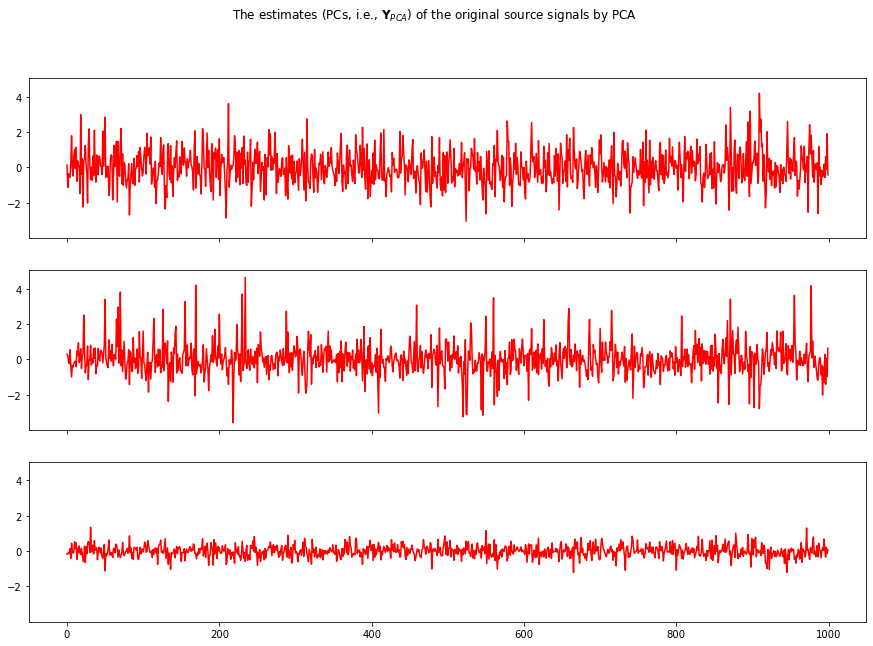

In [141]:
### Visualization --------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
# Plot seperated signals
ax[0].plot(n, Y_pred_PCA_rs[:,0], label="PC Y1", color = 'r')
ax[1].plot(n, Y_pred_PCA_rs[:,1], label="PC Y2", color = 'r')
ax[2].plot(n, Y_pred_PCA_rs[:,2], label="PC Y3", color = 'r')
plt.suptitle("The estimates (PCs, i.e., $\mathbf{Y}_{PCA}$) of the original source signals by PCA")
#plt.savefig("PCA estimates of source data.png", transparency=True)
plt.show()

In [142]:
Y_pred_PCA = pd.DataFrame(Y_pred_PCA)
Y_pred_PCA.columns = ['PC1', 'PC2', 'PC3']

fig = px.scatter_3d(Y_pred_PCA, x='PC1', y='PC2', z='PC3') #,range_x=Y_range, range_y=Y_range, range_z=Y_range, size=len(Y)*[0.1], width = 800, height = 800
fig.update_traces(marker_size = 3)
fig.show()
fig.write_html("Y_PCA.html")


## 3.3. FA Results (i.e., $\mathbf{Y}_{FA}$)

In [143]:
## -------------------------------------- 1.3. FA Analysis --------------------------------------------------------------
### Preprocessing Data --------------------------------------------------------------

from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components=3, rotation='varimax', random_state=0)
Y_pred_FA = FA.fit_transform(X)
FA.get_params()
Y_pred_FA.shape


(1000, 3)

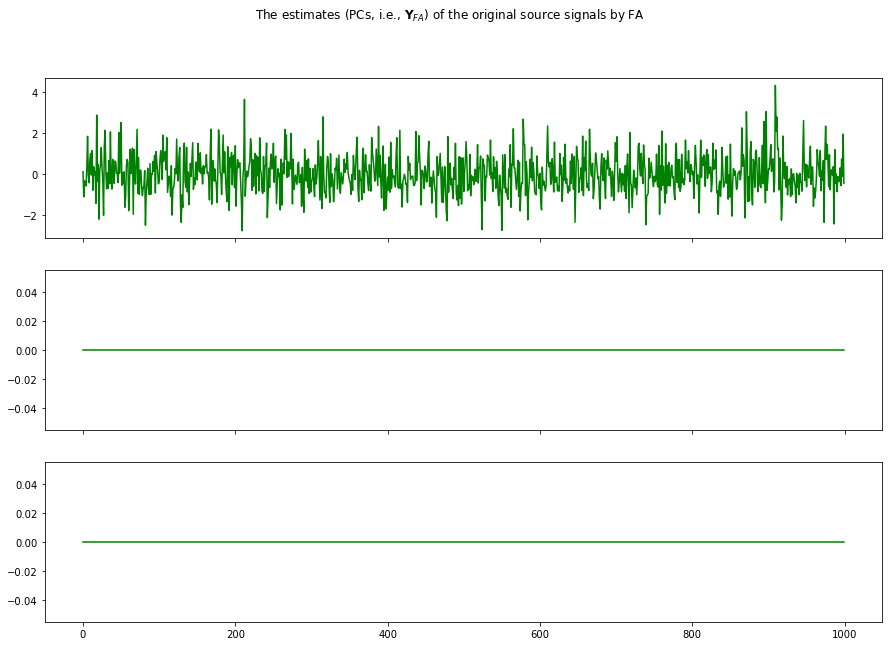

In [144]:
### Visualization --------------------------------------------------------------
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15,10))#, sharey=True
# Plot seperated signals
ax[0].plot(n, Y_pred_FA[:,0], label="Factor Y1", color = 'green')
ax[1].plot(n, Y_pred_FA[:,1], label="Factor Y2", color = 'green')
ax[2].plot(n, Y_pred_FA[:,2], label="Factor Y3", color = 'green')

plt.suptitle("The estimates (PCs, i.e., $\mathbf{Y}_{FA}$) of the original source signals by FA")
plt.show()
#plt.savefig("FA estimates of source data.png", transparency=True)

In [145]:
Y_pred_FA = pd.DataFrame(Y_pred_FA)
Y_pred_FA.columns = ['F1', 'F2', 'F3']

fig = px.scatter_3d(Y_pred_FA, x='F1', y='F2', z='F3') #,range_x=Y_range, range_y=Y_range, range_z=Y_range, size=len(Y)*[0.1], width = 800, height = 800
fig.update_traces(marker_size = 3)
fig.show()
fig.write_html("Y_FA.html")


- ## Review: Visual Comparison of True Independent Signals $\mathbf{Y}$ with Mixed Signals $\mathbf{X}$

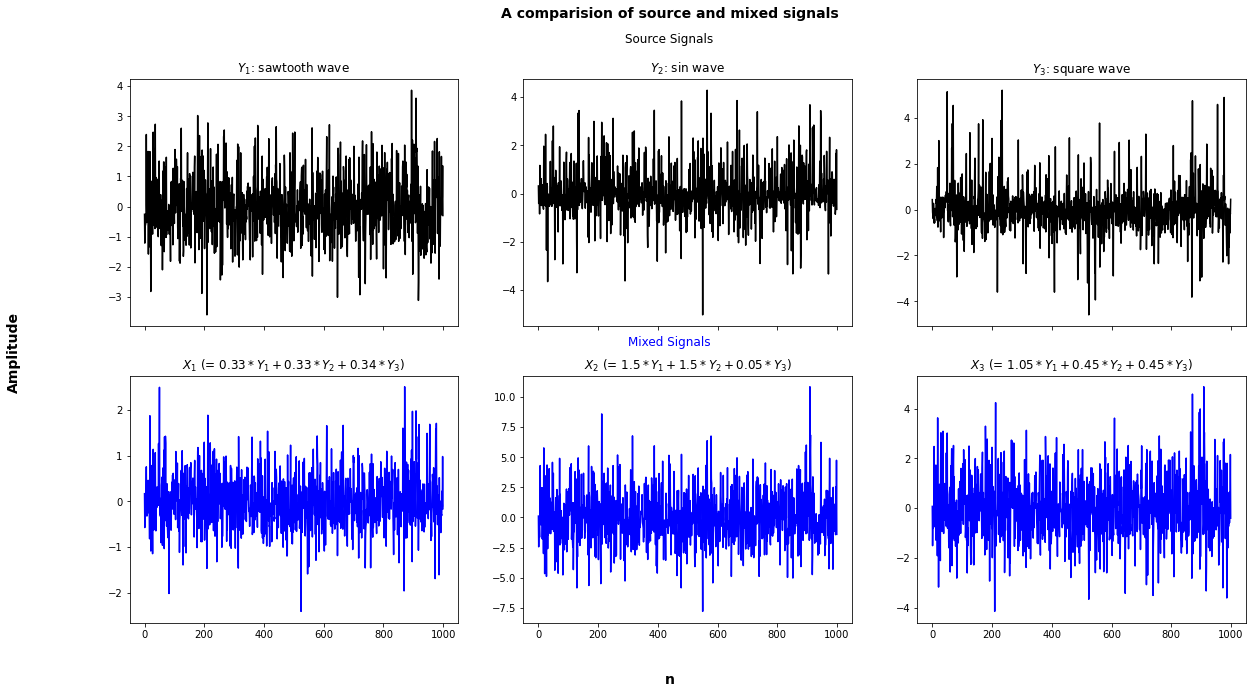

In [146]:
# Visualization of source and mixing data  --------------------------------------------------------------

fig, ax = plt.subplots(2, 3, sharex=True, figsize=(20,10)) #, sharey=True
# True source signal Y
ax[0,0].set_title('$Y_1$: sawtooth wave')
ax[0,0].plot(n, Y.Y1, label="Source Y1", color = 'k')
ax[0,1].set_title('$Y_2$: sin wave')
ax[0,1].plot(n, Y.Y2, label="Source Y2", color = 'k')
ax[0,2].set_title('$Y_3$: square wave')
ax[0,2].plot(n, Y.Y3, label="Source Y3", color = 'k')
fig.text(0.5, 0.93, 'Source Signals', ha='center', color='k', fontsize=12)

# Mixed signals X
ax[1,0].set_title(f'$X_1$ (= ${np.round(A[0,0],4)}*Y_1 + {np.round(A[0,1],4)}*Y_2 + {np.round(A[0,2],4)}*Y_3$)')
ax[1,0].plot(n, X.X1, label="Mixed X1", color = 'b')
ax[1,1].set_title(f'$X_2$ (= ${np.round(A[1,0],4)}*Y_1 + {np.round(A[1,1],4)}*Y_2 + {np.round(A[1,2],4)}*Y_3$)')
ax[1,1].plot(n, X.X2, label="Mixed X2", color = 'b')
ax[1,2].set_title(f'$X_3$ (= ${np.round(A[2,0],4)}*Y_1 + {np.round(A[2,1],4)}*Y_2 + {np.round(A[2,2],4)}*Y_3$)')
ax[1,2].plot(n, X.X3, label="Mixed X3", color = 'b')
fig.text(0.5, 0.51, 'Mixed Signals', ha='center', color='b', fontsize=12)


fig.text(0.5, 0.04, 'n', ha='center', fontsize=14, fontweight ='bold')
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14, fontweight ='bold')

plt.suptitle("A comparision of source and mixed signals", fontsize=14, fontweight ='bold')

plt.savefig("Compare source and mixing data (artificial).png", transparent=True)
plt.show()

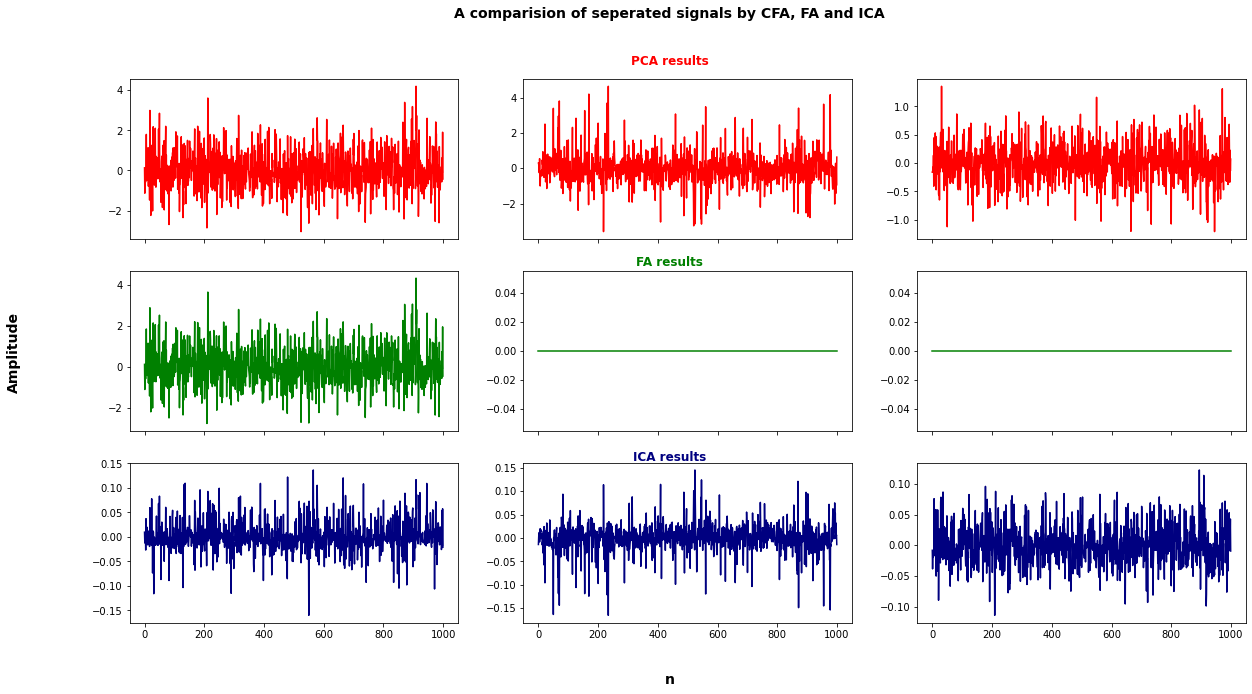

In [147]:
# ======================================= 2. Summary & Visualization of Results =========================================================

### Visualization of Results from PCA/FA/ICA --------------------------------------------------------------
fig, ax = plt.subplots(3, 3, sharex=True,  figsize=(20,10)) #sharey=True,
# Plot seperated signals: PCA
ax[0,0].plot(n, Y_pred_PCA_rs[:,0], label="PC Y1", color = 'r')
ax[0,1].plot(n, Y_pred_PCA_rs[:,1], label="PC Y2", color = 'r')
ax[0,2].plot(n, Y_pred_PCA_rs[:,2], label="PC Y3", color = 'r')
fig.text(0.5, 0.90, 'PCA results', ha='center', color='r', fontsize=12, fontweight ='bold')

# Plot seperated signals: FA
ax[1,0].plot(n, Y_pred_FA['F1'], label="Factor Y1", color = 'green')
ax[1,1].plot(n, Y_pred_FA['F2'], label="Factor Y2", color = 'green')
ax[1,2].plot(n, Y_pred_FA['F3'], label="Factor Y3", color = 'green')
fig.text(0.5, 0.62, 'FA results', ha='center', color='green', fontsize=12, fontweight ='bold')

# Plot seperated signals: ICA
ax[2,0].plot(n, Y_pred['IC1'], label="IC Y1", color = 'navy')
ax[2,1].plot(n, Y_pred['IC2'], label="IC Y2", color = 'navy')
ax[2,2].plot(n, Y_pred['IC3'], label="IC Y3", color = 'navy')
fig.text(0.5, 0.35, 'ICA results', ha='center', color='navy', fontsize=12, fontweight ='bold')

fig.text(0.5, 0.04, 'n', ha='center', fontsize=14, fontweight ='bold')
fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14, fontweight ='bold')


plt.suptitle("A comparision of seperated signals by CFA, FA and ICA", fontsize=14, fontweight ='bold')
plt.savefig("Compare estimates of source data from PCA-FA-ICA (artificial).png", transparent=True)
plt.show()




# 4. Check independence of signals ($\mathbf{Y}$ from ICA vs $\hat{\mathbf{Y}}$ from Mahalanobis transformation) through evaluation of cumulants

If signals are mutually independent, them all order of their cumulants should be approximated 0.

As a results, if we can find counterexamples for $\hat{\mathbf{Y}}$ (from Mahalanobis transformation) such that there exist non-zero cumulants, we then prove that $\hat{\mathbf{Y}}$ are NOT independent.

Eventually, the following results prove our speculation:

- ### Estimation of Cumulant $\mbox{ E}\{Y_1 * Y_3^2\}$ (both for independent and uncorrelated signals)

In [148]:
## 3.1. Compare Y vs Y_hat through estimating cumulant E{Y1 * Y3^2} V
C_Y = np.mean(Y_pred.IC1 * Y_pred.IC3**2); 
C_Y_hat = np.mean(Y_hat.Y1_m * Y_hat.Y3_m**2)
#print('Estimated cumulant E{{Y1^3 * Y2}} \n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_Mahal', 'Y_ICA'], index=['Cumulant'])


,Y_Mahal,Y_ICA
Cumulant,0.067443,0.000001


- ### Estimation of Cumulant $\mbox{ E}\{Y_2^2 * Y_3\}$ (both for independent and uncorrelated signals)

In [149]:
## 3.2. Compare Y vs Y_hat through estimating cumulant E{Y2^2 * Y3} V
C_Y = np.mean(Y_pred.IC2**2 * Y_pred.IC3); 
C_Y_hat = np.mean(Y_hat.Y2_m**2 * Y_hat.Y3_m)
#print('Estimated cumulant E{{Y2^2 * Y3}}\n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_Mahal', 'Y_ICA'], index=['Cumulant'])



,Y_Mahal,Y_ICA
Cumulant,0.045035,-9.552667e-08


- ### Estimation of Cumulant $\mbox{ E}\{Y_1^3 * Y_2\}$ (both for independent and uncorrelated signals)

In [150]:
## 3.3. Compare Y vs Y_hat through estimating cumulant E{Y1^3 * Y2} V
C_Y = np.mean(Y_pred.IC1**3 * Y_pred.IC2); 
C_Y_hat = np.mean(Y_hat.Y1_m**3 * Y_hat.Y2_m)
#print('Estimated cumulant E{{Y1^3 * Y2}} \n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_Mahal', 'Y_ICA'], index=['Cumulant'])


,Y_Mahal,Y_ICA
Cumulant,-0.708092,1.264929e-07


- ### Estimation of Cumulant $\mbox{ E}\{Y_1^2 * Y_2 * Y_3\}$ (both for independent and uncorrelated signals)

In [151]:
## 3.4. Compare Y vs Y_hat through estimating  E{Y1^2 * Y2 * Y3} V
C_Y = np.mean(Y_pred.IC1**2 * Y_pred.IC2 * Y_pred.IC3); 
C_Y_hat = np.mean(Y_hat.Y1_m**2 * Y_hat.Y2_m * Y_hat.Y3_m)
#print('Estimated cumulant E{{Y1^2 * Y2 * Y3}} \n from Mahalanobis is {}, \n while from ICA is {}'.format( np.round(C_Y_hat, 4), np.round(C_Y, 4) ))

pd.DataFrame(np.array([[C_Y_hat, C_Y]]), columns=['Y_Mahal', 'Y_ICA'], index=['Cumulant'])


,Y_Mahal,Y_ICA
Cumulant,-0.542761,7.364865e-08


- ## Summary

From the results of ICA, PCA as well as FA, we can see that:
1. PCA and FA both fail at separating **independent** signals; just as Mahalanobis transformation demonstrated above, these two techniques basically can only extract **uncorrelated** signals, which is why they fail at extraction while true signals are mutually actually independent.
1. ICA, however, can quite precisely approximate **independent** signals, as required (though bound with minor errors, which may due to sample size, or the design of waveform).
